**PIA: Entrenamiento de una Red Neuronal convolusional**

 Jesús Iván Oviedo Molina IMTC

**PASO 1. IMPORTAR LIBRERÍAS**

In [1]:
##Librerías Importadas
import numpy as np                                  
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from PIL import Image
import warnings
from PIL import Image
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import models, layers
import os
import random

**PASO 2. CARGAR DATOS**

In [2]:
train_images = '/kaggle/input/animals10/raw-img'
test_images = '/kaggle/input/animals10/raw-img'

train_labels = tf.keras.utils.image_dataset_from_directory(train_images)
test_labels= tf.keras.utils.image_dataset_from_directory(test_images)

Found 26179 files belonging to 10 classes.
Found 26179 files belonging to 10 classes.


**PASO 3. CREAR ETIQUETAS Y SETS DE ENTRENAMIENTO**

In [3]:
## Clases y numemro de Clases  
animals = train_labels.class_names
print(animals)
print(len(animals))


['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
10


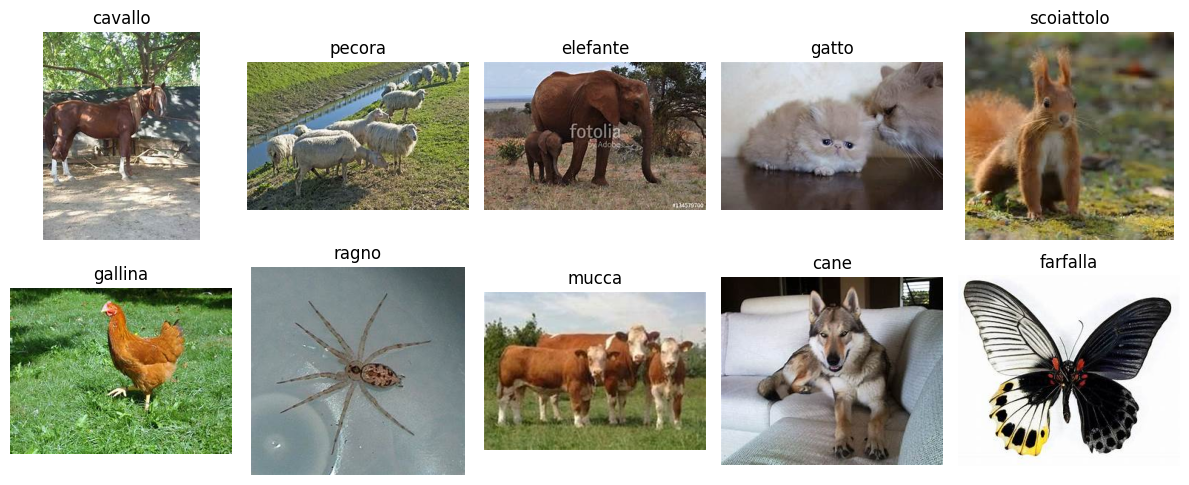

In [4]:
import os 

train_dir = "/kaggle/input/animals10/raw-img"

image_categories = os.listdir(train_dir)

plt.figure(figsize=(12, 12))

for i, category in enumerate(image_categories):
    image_files = os.listdir(os.path.join(train_dir, category))
    image_file = image_files[0]
    image_path = os.path.join(train_dir, category, image_file)
    image = Image.open(image_path)
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()

**PASO 4. SELECCIÓN DE MODELO**

In [5]:
## definir el modelo secuencial de la red 
model = Sequential()  

In [6]:
## Modelo convulcional 
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3))) 

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())







In [7]:
##Clasificacion
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(animals)))

In [8]:
#compilacion 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
model.summary() #datos


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)       

**PASO 5. ENTRENAMIENTO**

In [10]:
history = model.fit(train_labels, validation_data= test_labels, epochs=10)

Epoch 1/10
819/819 [==============================] - 1054s 1s/step - loss: 1.6314 - accuracy: 0.4353 - val_loss: 1.2170 - val_accuracy: 0.5875
Epoch 2/10
819/819 [==============================] - 1055s 1s/step - loss: 1.1346 - accuracy: 0.6171 - val_loss: 0.8017 - val_accuracy: 0.7398
Epoch 3/10
819/819 [==============================] - 1076s 1s/step - loss: 0.8451 - accuracy: 0.7170 - val_loss: 0.5841 - val_accuracy: 0.8117
Epoch 4/10
819/819 [==============================] - 1061s 1s/step - loss: 0.5854 - accuracy: 0.8034 - val_loss: 0.4305 - val_accuracy: 0.8587
Epoch 5/10
819/819 [==============================] - 1052s 1s/step - loss: 0.3648 - accuracy: 0.8775 - val_loss: 0.2608 - val_accuracy: 0.9161
Epoch 6/10
819/819 [==============================] - 1056s 1s/step - loss: 0.2180 - accuracy: 0.9270 - val_loss: 0.1803 - val_accuracy: 0.9374
Epoch 7/10
819/819 [==============================] - 1053s 1s/step - loss: 0.1585 - accuracy: 0.9477 - val_loss: 0.2767 - val_accuracy:

**PASO 6. CURVA DE VALIDACIÓN VS ENTRENAMIENTO**

Text(0.5, 1.0, 'Training and Validation Accuracy')

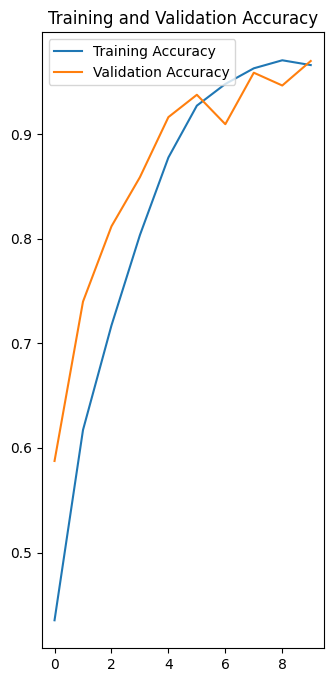

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')


**PASO 7. PRUEBA DEL MODELO**

In [12]:
image_paths = []

In [13]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)

Imagen seleccionada: /kaggle/input/animals10/raw-img/pecora/OIP-yrLONRQAYFpV6BiZ9F5psQAAAA.jpeg


1/1 [==============================] - 0s 147ms/step
This image most likely belongs to pecora with a 69.34 percent confidence.


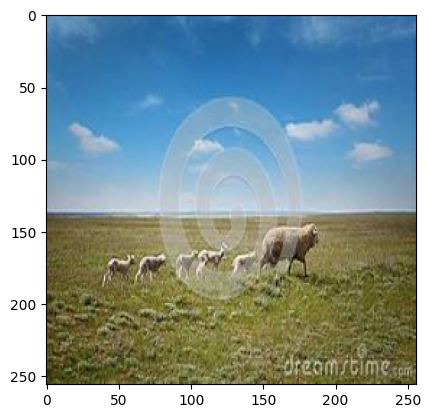

In [14]:
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/gallina/OIP-wVReIznEv7u44dqIxio1sQHaJy.jpeg
1/1 [==============================] - 0s 33ms/step
This image most likely belongs to gallina with a 100.00 percent confidence.


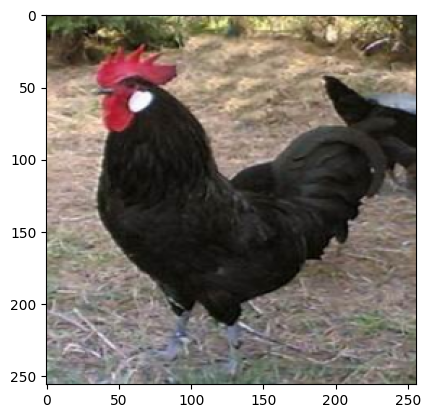

In [15]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()



Imagen seleccionada: /kaggle/input/animals10/raw-img/ragno/OIP-J4EhP74VKV1ikhY3lEvFFAHaLD.jpeg
1/1 [==============================] - 0s 33ms/step
This image most likely belongs to ragno with a 99.98 percent confidence.


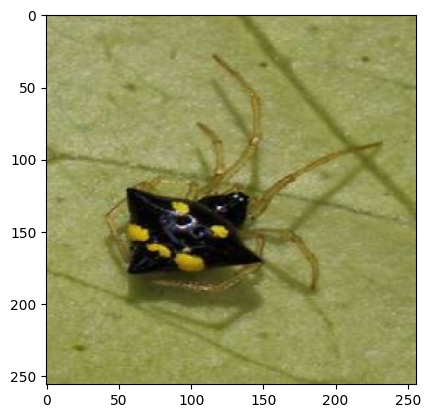

In [16]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/animals10/raw-img/gallina/OIP-sHE39rtGfHBC649G1EQmjAHaFj.jpeg
1/1 [==============================] - 0s 33ms/step
This image most likely belongs to gallina with a 99.87 percent confidence.


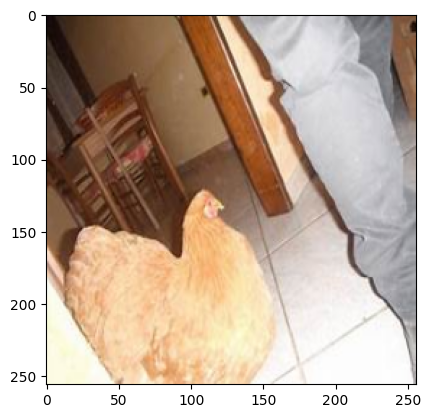

In [17]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/animals10/raw-img/cavallo/OIP-QMV75_Fthh-F7YqG59IvqgAAAA.jpeg
1/1 [==============================] - 0s 31ms/step
This image most likely belongs to cavallo with a 99.60 percent confidence.


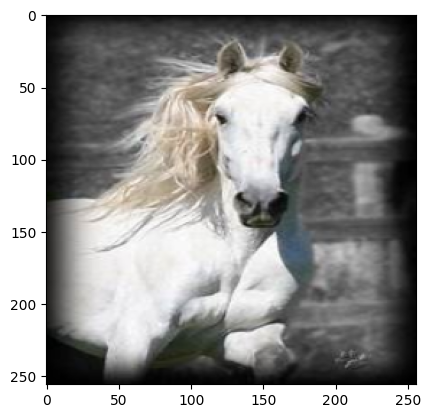

In [18]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()
